# Functional API

The functional API of `medchem` provides an easy and uniform way to access most the `medchem` alerts, filters and rules proposed in the other `medchem` module.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import datamol as dm
import pandas as pd

import medchem as mc


## Generic filters

All the filters can be applied on a list of SMILES or molecule objects. It's also possible to run the filtering in parallel in processes or threads.

_The below examples contains molecules that are shown for illustration purposes._

### `macrocycle_filter`

Find molecules that do not infringe the strict maximum cycle size.


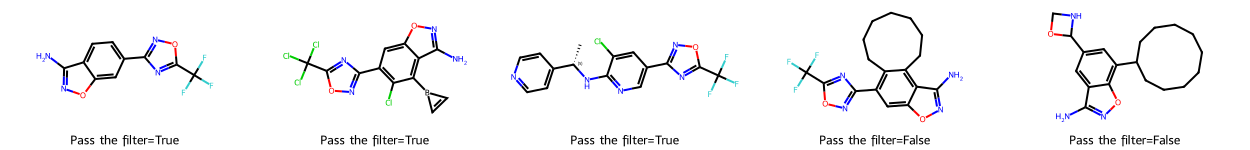

In [4]:
smiles_list = [
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.macrocycle_filter(mols, max_cycle_size=7, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `atom_list_filter`

Find molecules without any atom from a set of unwanted atomic symbols and with all atoms in the set of wanted atom list.


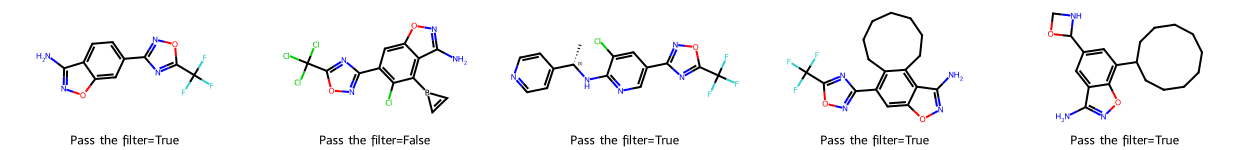

In [5]:
smiles_list = [
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.atom_list_filter(mols, unwanted_atom_list=["B"], return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `ring_infraction_filter`

Find molecules that have a ring infraction filter. This filter focuses on checking for rings that are too small to have an heteroatom.


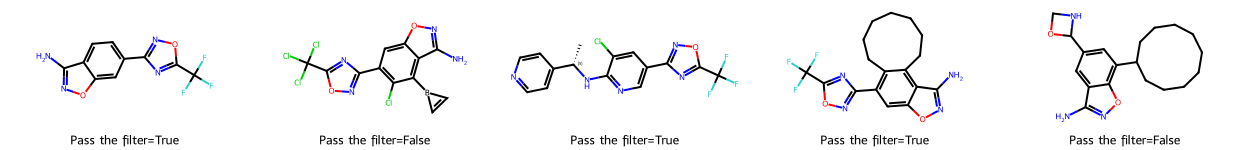

In [6]:
smiles_list = [
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.ring_infraction_filter(mols, hetcycle_min_size=4, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `num_atom_filter`

Find molecules that match the number of atom range constraints.


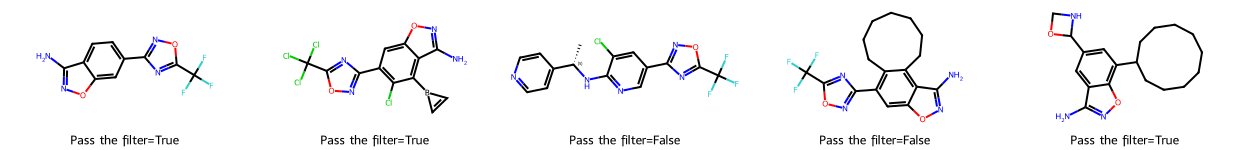

In [7]:
smiles_list = [
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.num_atom_filter(mols, min_atoms=0, max_atoms=25, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `num_stereo_center_filter`

Find molecules that match the number of stereo center constraints. In general, molecules with too many undefined stereo centers are not desirable.


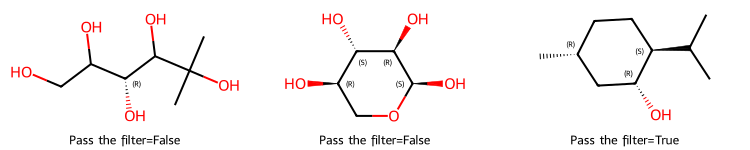

In [8]:
smiles_list = [
    "CC(C)(O)C(O)[C@H](O)C(O)CO",  # fail, too many undefined stereocenter
    "C1[C@H]([C@@H]([C@H]([C@H](O1)O)O)O)O",  # fail, too many stereocenter
    "C[C@@H]1CC[C@H]([C@@H](C1)O)C(C)C",  # pass
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.num_stereo_center_filter(
    mols,
    max_stereo_centers=4,
    max_undefined_stereo_centers=2,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `halogenicity_filter`

Find molecules that do not exceed halogen count threshold. This filter is useful for removing halogen biases in generated or enumerated chemical space during goal-directed optimization.


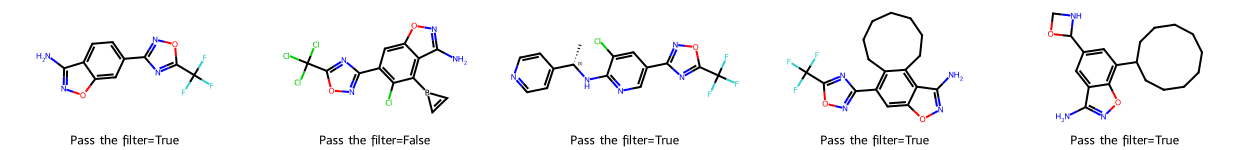

In [9]:
smiles_list = [
    "Nc1noc2cc(-c3noc(C(F)(F)F)n3)ccc12",
    "Nc1noc2cc(-c3noc(n3)C(Cl)(Cl)Cl)c(Cl)c(B3C=C3)c12",
    "C[C@H](Nc1ncc(-c2noc(C(F)(F)F)n2)cc1Cl)c1ccncc1",
    "NC1=NOC2=CC(C3=NOC(=N3)C(F)(F)F)=C3CCCCCCCC3=C12",
    "Nc1noc2c(cc(cc12)C1NCO1)C1CCCCCCCCC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.halogenicity_filter(mols, thresh_F=6, thresh_Br=3, thresh_Cl=3, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=5, mol_size=(250, 150))


### `symmetry_filter`

Find molecules that are not symmetrical, given a symmetry threshold. This filter was designed to offset the symmetry issue in molecular design, where some models tend to generate highly symmetrical molecules due to substructure bias.


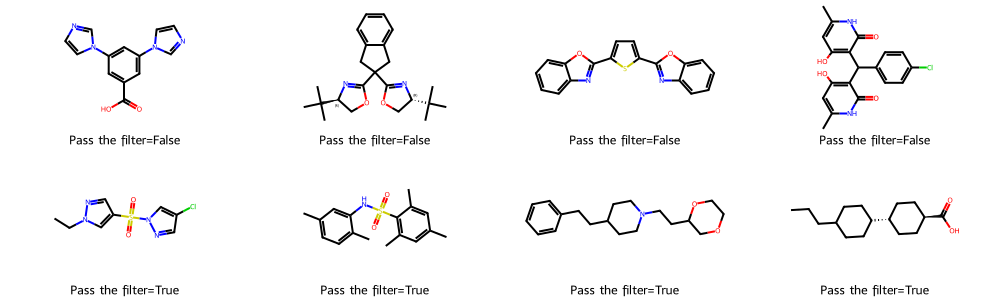

In [10]:
smiles_list = [
    # symmetric mols
    "O=C(O)c1cc(-n2ccnc2)cc(-n2ccnc2)c1",
    "CC(C)(C)[C@@H]1COC(C2(C3=N[C@H](C(C)(C)C)CO3)Cc3ccccc3C2)=N1",
    "c1ccc2oc(-c3ccc(-c4nc5ccccc5o4)s3)nc2c1",
    "Cc1cc(O)c(C(c2ccc(Cl)cc2)c2c(O)cc(C)[nH]c2=O)c(=O)[nH]1",
    # non-symmetric mols
    "CCn1cc(S(=O)(=O)n2cc(Cl)cn2)cn1",
    "Cc1cc(C)c(S(=O)(=O)Nc2cc(C)ccc2C)c(C)c1",
    "c1ccc(CCC2CCN(CCC3COCCO3)CC2)cc1",
    "CCCC1CCC([C@H]2CC[C@H](C(=O)O)CC2)CC1",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.symmetry_filter(mols, symmetry_threshold=0.8, return_idx=False)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=4, mol_size=(250, 150))


## Medchem API


### `alert_filter`

Filter a dataset of molecules, based on common structural alerts and specific rules.


Common alerts filtering:   0%|          | 0/8 [00:00<?, ?it/s]

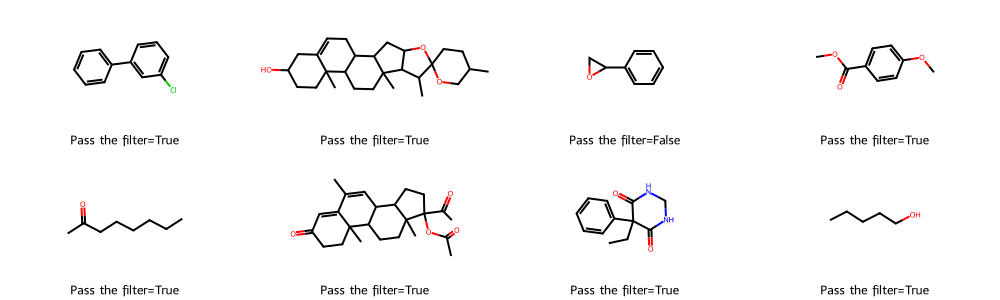

In [11]:
data = dm.data.solubility()
data = data.sample(n=8, random_state=19)
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply the filter
out = mc.functional.alert_filter(
    mols=data["mol"].tolist(),
    alerts=["BMS"],
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `nibr_filter`

Filter a set of molecules based on the Novartis Institutes for BioMedical Research screening deck curation process.


NIBR filtering:   0%|          | 0/8 [00:00<?, ?it/s]

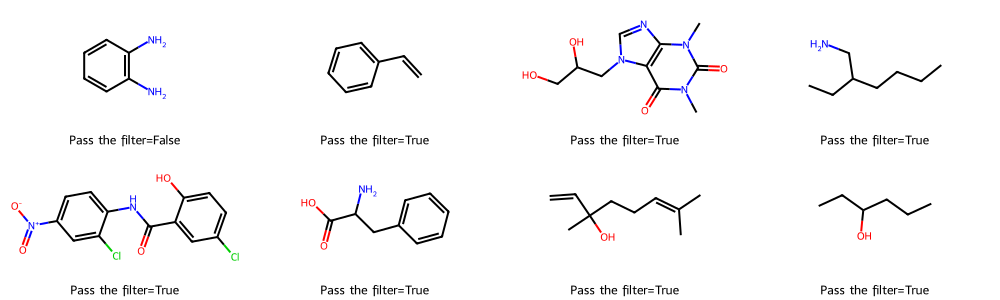

In [12]:
data = dm.data.solubility()
data = data.sample(n=8, random_state=55)
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply the filter
out = mc.functional.nibr_filter(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `catalog_filter`

Filter a list of compounds according to a catalog of structural alerts and patterns.

_Note: Medchem has a low-level `catalogs` API, allowing the user to provide their own catalogs too. See the [Catalogs](./Catalogs.html) tutorial for more details._


Filtering with catalogs:   0%|          | 0/1 [00:00<?, ?it/s]

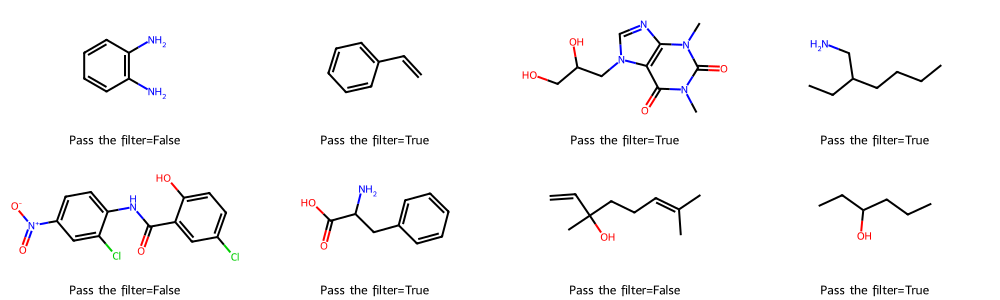

In [13]:
data = dm.data.solubility()
data = data.sample(n=8, random_state=55)
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply the filter
out = mc.functional.catalog_filter(
    mols=data["mol"].tolist(),
    catalogs=["tox", "pains"],
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `chemical_group_filter`

Filter a list of compounds according to a chemical group instance.


Filtering with catalogs:   0%|          | 0/1 [00:00<?, ?it/s]

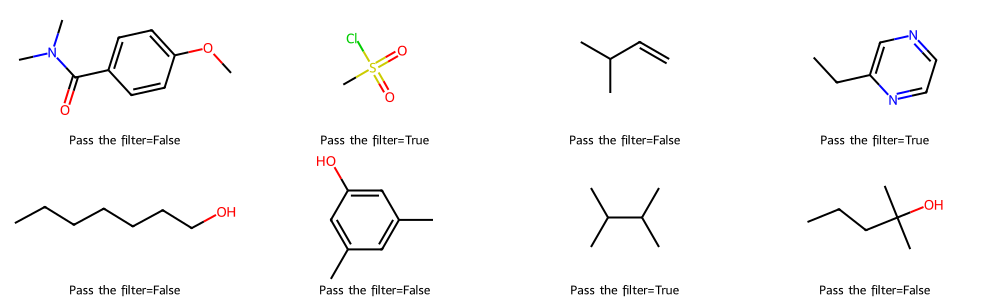

In [14]:
data = dm.data.freesolv()
data = data.iloc[:8]
data["mol"] = data["smiles"].apply(dm.to_mol)

cg = mc.groups.ChemicalGroup("common_organic_solvents")

# Apply the filter
out = mc.functional.chemical_group_filter(
    mols=data["mol"].tolist(),
    chemical_group=cg,
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `rules_filter`

Filter a list of compounds according to a predefined set of rules.


Filter by rules:   0%|          | 0/8 [00:00<?, ?it/s]

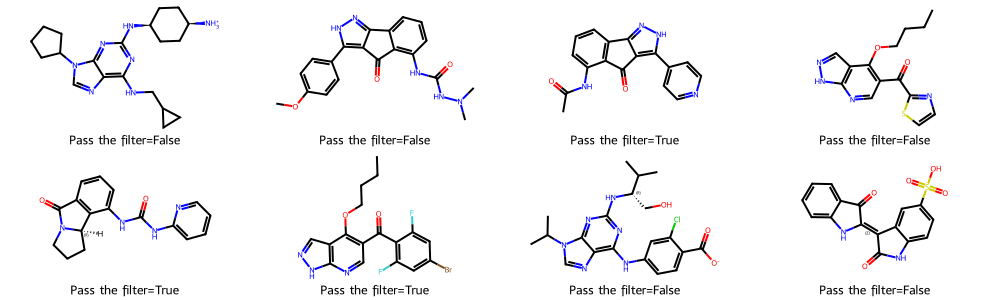

In [15]:
data = dm.data.cdk2()
data = data.sample(n=8, random_state=19)
data["mol"] = data["smiles"].apply(dm.to_mol)

rfilter = mc.rules.RuleFilters(rule_list=["rule_of_five", "rule_of_oprea", "rule_of_cns"])

# Apply the filter
out = mc.functional.rules_filter(
    mols=data["mol"].tolist(),
    rules=rfilter,
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `complexity_filter`

Filter a list of compounds according to a complexity metric.

In the below example, the complexity is compared to the ones encountered on ZINC15.


Complexity Evaluation:   0%|          | 0/8 [00:00<?, ?it/s]

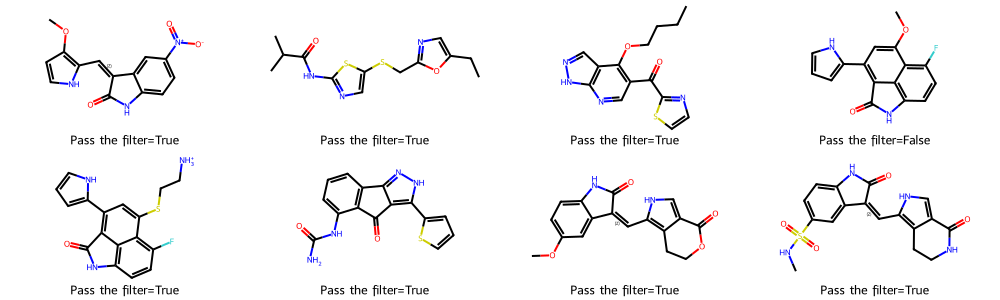

In [16]:
data = dm.data.cdk2()
data = data.iloc[10:18]
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply the filter
out = mc.functional.complexity_filter(
    mols=data["mol"].tolist(),
    complexity_metric="bertz",
    threshold_stats_file="zinc_15_available",
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `bredt_filter`

Filter a list of compounds according to [Bredt's rules](https://en.wikipedia.org/wiki/Bredt%27s_rule).


To mol:   0%|          | 0/8 [00:00<?, ?it/s]

Filtering with catalogs:   0%|          | 0/1 [00:00<?, ?it/s]

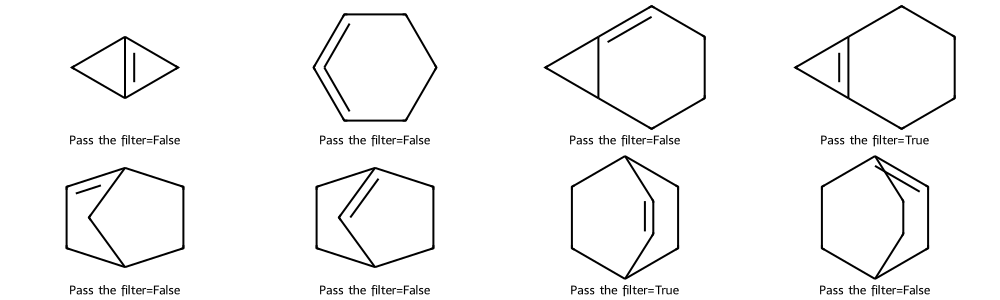

In [16]:
smiles_list = [
    "C1C2=C1C2",
    "C1CC=C=CC1",
    "C1C2CCCC=C12",
    "C1C2=C1CCCC2",  # is ok
    "C1CC2=CCC1C2",
    "C1CC2=CC1CC2",
    "C1CC2CCC1C=C2",  # is ok
    "C1CC2=CCC1CC2",
]
mols = [dm.to_mol(s) for s in smiles_list]

# Apply the filter
out = mc.functional.bredt_filter(
    mols=smiles_list,
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(mols, legends=legends, n_cols=4, mol_size=(250, 150))


### `molecular_graph_filter`

Filter a list of compounds according to unstable molecular graph patterns. This list was obtained from observation around technically valid molecular graphs from deep generative models that are not stable.

Match:   0%|          | 0/8 [00:00<?, ?it/s]

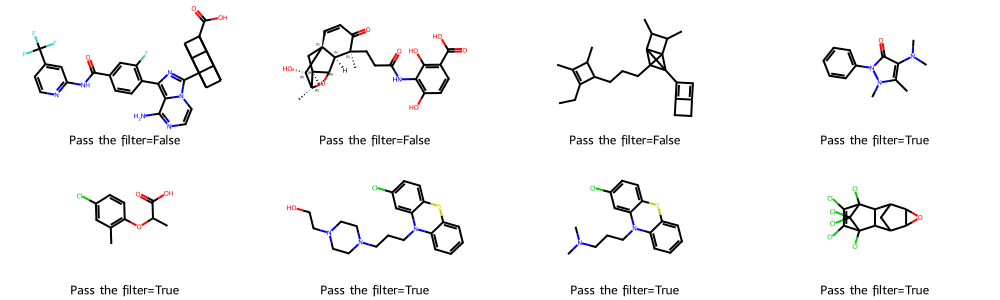

In [32]:
smiles_list = [
    "C1=CC(=C(C=C1C(=O)NC2=NC=CC(=C2)C(F)(F)F)F)C3=C4C(=NC=CN4C(=N3)C56C7C8C5C9C6C7C89C(=O)O)N",
    "C[C@@]1([C@@H]2[C@]3(C[C@]45[C@]2(C4)O[C@]5([C@@H]3O)C)C=CC1=O)CCC(=O)NC6=C(C=CC(=C6O)C(=O)O)O",
    "CCC1=C(C(C1CCCC23C45C2(C34C6=C7CCC7=C6)C(C5C)C)C)C",
    "c1ccccc1N2C(=O)C(N(C)C)=C(C)N2C",
    "O=C(O)C(Oc(c(cc(c1)Cl)C)c1)C",
    "OCCN4CCN(CCCN2c1ccccc1Sc3ccc(Cl)cc23)CC4",
    "CN(C)CCCN2c1ccccc1Sc3ccc(Cl)cc23",
    "ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl",
]
data = pd.DataFrame({"smiles": smiles_list})
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply the filter
out = mc.functional.molecular_graph_filter(
    mols=data["mol"].tolist(),
    max_severity=5,
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `lilly_demerit_filter`

Run the Eli Lilly's demerit filter on current list of molecules.

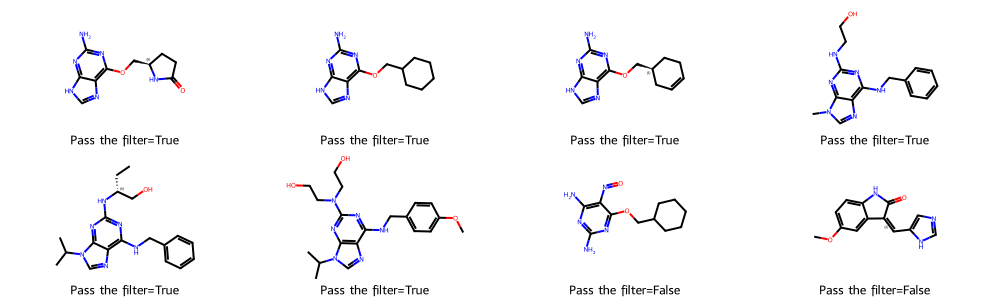

In [18]:
data = dm.data.cdk2()
data = data.iloc[2:10]
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply the filter
out = mc.functional.lilly_demerit_filter(
    mols=data["mol"].tolist(),
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


### `protecting_groups_filter`

Filter a list of compounds according to match to known protecting groups.

Checking protecting groups:   0%|          | 0/8 [00:00<?, ?it/s]

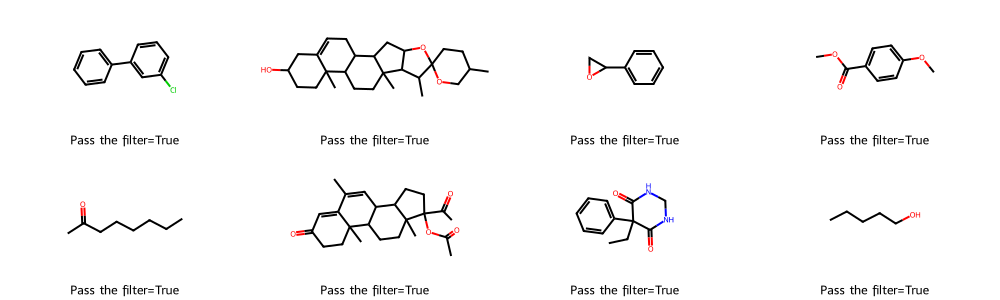

In [19]:
data = dm.data.solubility()
data = data.sample(n=8, random_state=19)
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply the filter
out = mc.functional.protecting_groups_filter(
    mols=data["mol"].tolist(),
    protecting_groups=[
        "fmoc",
        "tert-butoxymethyl",
        "tert-butyl carbamate",
        "tert-butyloxycarbonyl",
    ],
    n_jobs=-1,
    progress=True,
    return_idx=False,
)

legends = [f"Pass the filter={o}" for o in out]
dm.to_image(data["mol"].tolist(), legends=legends, n_cols=4, mol_size=(250, 150))


---

-- The End :-)